In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Data Description

**checkin_acc:** Represents the status of the checking account.

**duration:** The duration in months.

**credit_history:** Indicates the credit history of the applicant.

**amount:** The amount of credit requested.

**savings_acc:** Represents the status of the savings account.

**present_emp_since:** Indicates the duration of the present employment.

**inst_rate:** The installment rate as a percentage of disposable income.


**personal_status:** Represents the personal status and sex of the applicant.

**residing_since:** The number of years the applicant has been residing at the current address.

**age:** The age of the applicant in years.

**inst_plans:** Indicates the installment plans.

**num_credits:** The number of existing credits at this bank.

**job:** Represents the type of job of the applicant.


In [164]:
df = pd.read_excel('German Credit Data.xlsx')
df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [165]:
df.shape

(1000, 14)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [167]:
df.describe(include = 'number')

,duration,amount,inst_rate,residing_since,age,num_credits,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,1.000000


### Inferences 

    
**Duration:** The loan duration varies from 4 to 72 months, indicating a wide range of repayment periods. This suggests that borrowers have flexibility in choosing loan terms that suit their needs.

**Amount:** The loan amounts range from 250 to 18,424 units. This indicates that the dataset includes a wide range of loan sizes, accommodating both small and large loan requests.

**Installment Rate:** The installment rate ranges from 1 to 4. A higher installment rate indicates a higher proportion of the disposable income dedicated to loan repayments. It can be inferred that borrowers with higher installment rates may have a relatively higher financial burden.

**Residing Since:** The duration of residence ranges from 1 to 4 years. This variable represents the length of time the applicant has lived at their current address. It could potentially reflect stability and reliability in terms of residency.

**Age:** The age of loan applicants ranges from 19 to 75 years. This wide age range suggests that individuals of varying ages are seeking loans, potentially for diverse purposes such as education, housing, or other expenses.

**Number of Credits:** The number of existing credits ranges from 1 to 4. This variable represents the number of other credits the applicant currently has, indicating their credit utilization and financial obligations. Higher numbers of existing credits may indicate a higher level of debt or financial commitments.

**Status:** The target variable, "status," represents whether a loan applicant defaulted (1) or did not default (0). The default rate in the dataset is approximately 30%, indicating a significant proportion of loan applicants facing difficulties in repayment.




In [168]:
df.describe(include = 'object')

,checkin_acc,credit_history,savings_acc,present_emp_since,personal_status,inst_plans,job
count,1000,1000,1000,1000,1000,1000,1000
unique,4,5,5,5,4,3,4
top,A14,A32,A61,A73,A93,A143,A173
freq,394,530,603,339,548,814,630


### Inferences

**Checking Account:** The most frequent category, "A14," appearing 394 times, suggests that a significant number of loan applicants have a checking account type represented by this category. This information is important because the type of checking account can provide insights into the applicant's financial stability and banking history, which can be relevant factors in assessing their creditworthiness.

**Credit History:** The most frequent category, "A32," occurring 530 times, indicates that a large number of loan applicants have a credit history represented by this category. Credit history is a crucial factor in evaluating an applicant's creditworthiness, as it reflects their past repayment behavior. The high frequency of this category suggests that a substantial portion of the applicants have a satisfactory credit history.

**Savings Account:** The most frequent category, "A61," appearing 603 times, indicates that a significant majority of loan applicants have a savings account type represented by this category. The presence of a savings account can signify financial stability and the ability to accumulate funds, which can be considered positive factors in the loan application process.

**Present Employment Since:** The most frequent category, "A73," occurring 339 times, suggests that a considerable number of loan applicants have been employed for the duration represented by this category. Employment stability and a longer duration of present employment can be important factors for lenders to assess the applicant's income stability and repayment capacity.

**Personal Status:** The most frequent category, "A93," appearing 548 times, indicates that a significant number of loan applicants fall into this personal status category. Personal status can provide insights into the applicant's marital or social status, which can be relevant in assessing their financial responsibilities and stability.

**Installment Plans:** The most frequent category, "A143," occurring 814 times, suggests that a large majority of loan applicants have an installment plan type represented by this category. The presence of an installment plan indicates the applicant's prior experience with structured payment obligations, which can demonstrate their ability to handle regular loan repayments.

**Job:** The most frequent category, "A173," appearing 630 times, suggests that a significant number of loan applicants have a job type represented by this category. The applicant's job type can provide insights into their income level, stability, and profession-specific factors that might impact their ability to repay the loan.


In [169]:
df.isna().sum()

checkin_acc          0
duration             0
credit_history       0
amount               0
savings_acc          0
present_emp_since    0
inst_rate            0
personal_status      0
residing_since       0
age                  0
inst_plans           0
num_credits          0
job                  0
status               0
dtype: int64

In [170]:
df.dtypes

checkin_acc          object
duration              int64
credit_history       object
amount                int64
savings_acc          object
present_emp_since    object
inst_rate             int64
personal_status      object
residing_since        int64
age                   int64
inst_plans           object
num_credits           int64
job                  object
status                int64
dtype: object

/var/folders/wd/8svmdflj0dn0__k8hfsllft40000gn/T/ipykernel_5405/2813505486.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap="viridis")


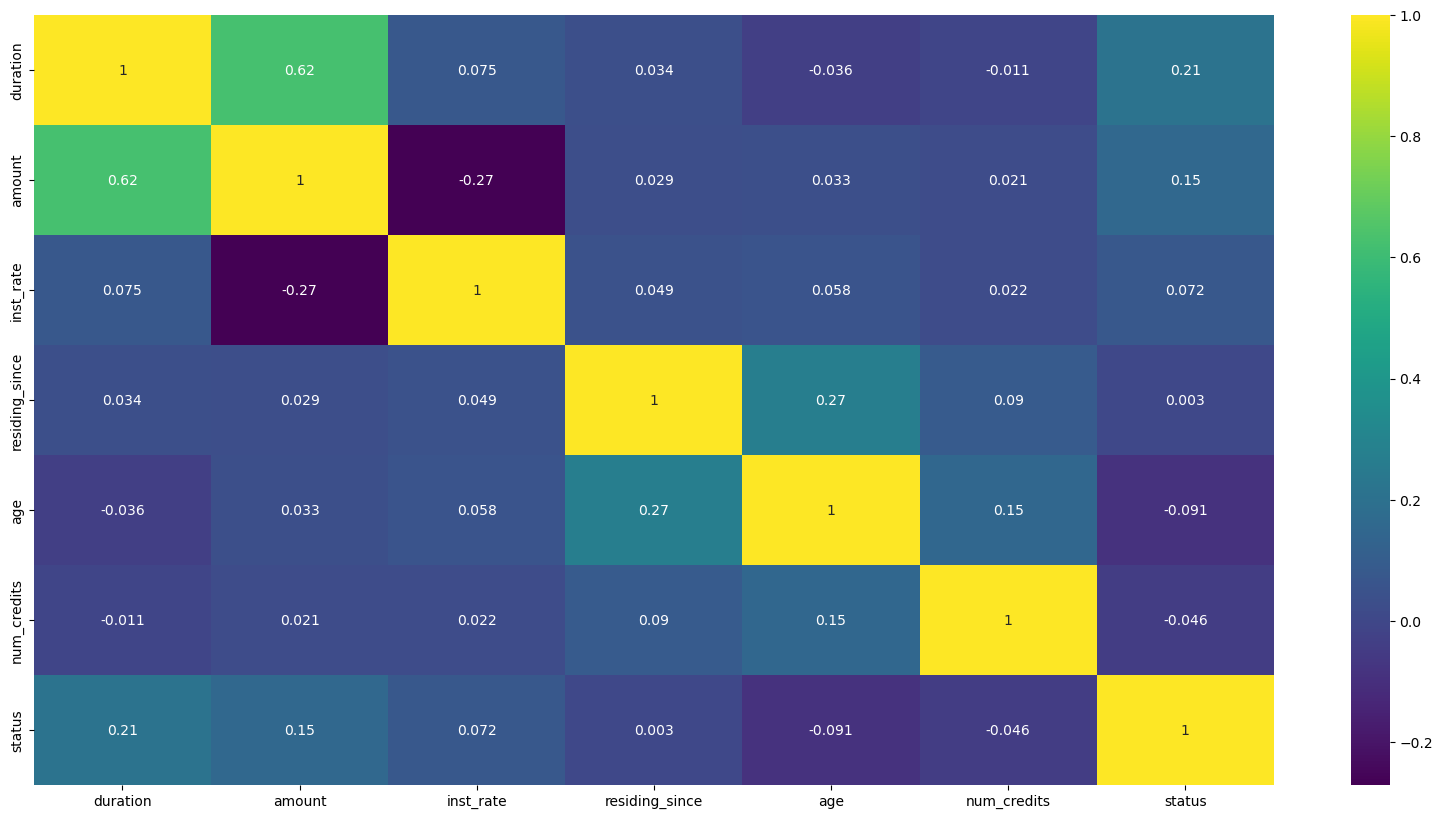

In [171]:
# using heatmap to check correlation

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cmap="viridis")
plt.show()

**Inferences**

- The amount of the loan and the length of the loan are strongly correlated. This suggests that borrowers who take out larger loans are also more likely to take out loans for longer periods of time.

- The correlation coefficient between the features "residing since" and "age" is 0.27 . This means that there is a weak positive correlation between these two features. This suggests that borrowers who have lived in their current residence for longer periods of time are more likely to be older.

- The correlation coefficient of 0.21 between the "status" (target variable) and "duration" suggests a weak positive correlation between these two variables. This means that there is a slight tendency for a longer loan duration to be associated with a higher likelihood of a default(1) status.

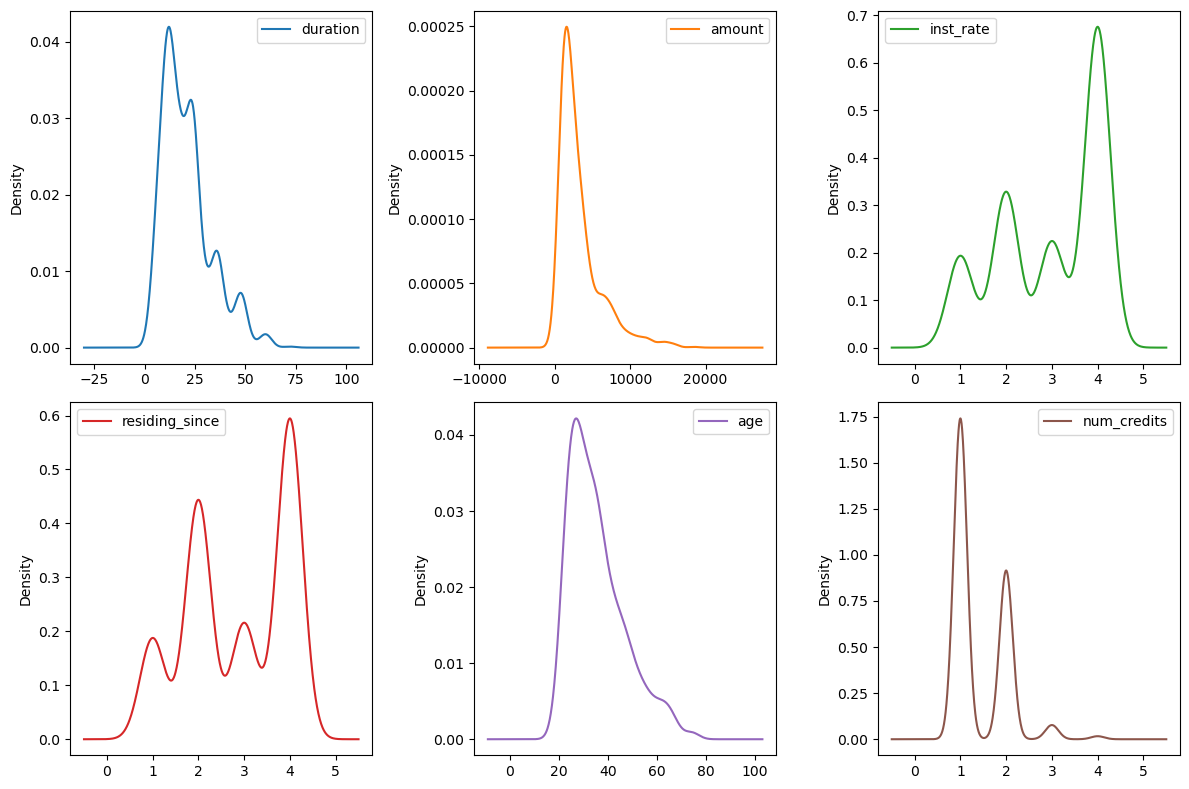

In [172]:
num_vars = ['duration', 'amount', 'inst_rate', 'residing_since', 'age', 'num_credits']
df[num_vars].plot(kind='density', subplots=True, layout=(2, 3), sharex=False, figsize=(12, 8))
plt.tight_layout()
plt.show()

**Inference**

- Mostly people prefer shorter period of loans. Shorter loan periods typically result in lower total interest paid over the longer period of the loan. Borrowers may prefer to minimize the overall cost of borrowing by opting for shorter loan durations.

- People prefer smaller amount of loans and as the amount increase the amount od people decrease rapidly, This is beacuse of the borrowers capacity(income) and benifits that banks provide.

- The interest rate increases with the number of year which makes sense. Beacause, banks often charge higher interest rates for loans with longer repayment periods due to factors such as increased risk and inflation.

- People with age 18-30 take higher amount of loans, as the age increases the count of loans decreases.

- Many people prefer taking only 1 or 2 loan from the bank, beacause of the risk and other constraint associated to it, Very few people prefer to take 3 or more loan

## Univariate Analysis 

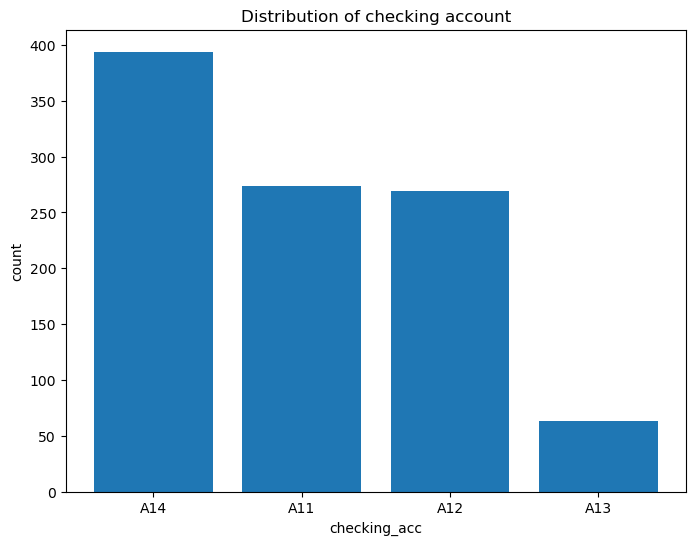

In [173]:
hotel_counts = df['checkin_acc'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(hotel_counts.index, hotel_counts.values)
plt.xlabel('checking_acc')
plt.ylabel('count')
plt.title('Distribution of checking account')
plt.show()

A14 has the most checking account followed by A11 & A12, whereas A13 has the least number of checking accounts.

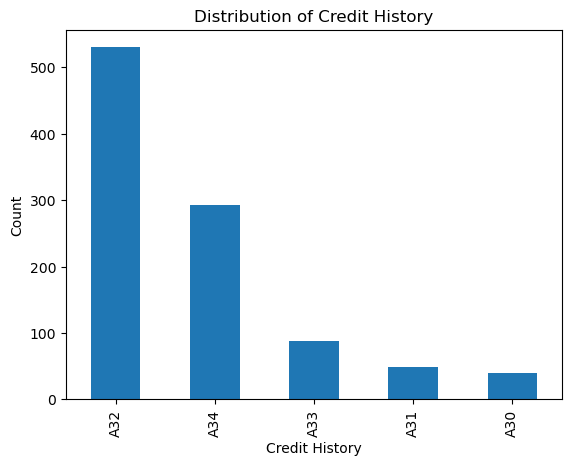

In [174]:
# Count the number of occurrences for each category
credit_history_counts = df['credit_history'].value_counts()

# Visualize the distribution using a bar plot
credit_history_counts.plot(kind='bar')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Distribution of Credit History')
plt.show()

# Calculate the percentage of each category
credit_history_percentages = df['credit_history'].value_counts(normalize=True) * 100


A32 has the highest credit history, means he is most frequent customer of the bank

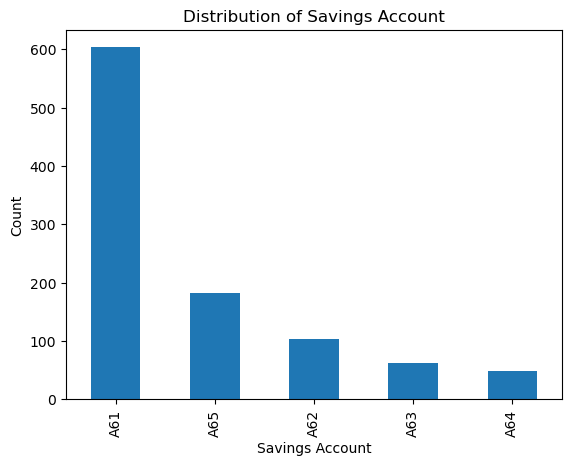

In [175]:
# Count the number of occurrences for each category
savings_acc_counts = df['savings_acc'].value_counts()

# Visualize the distribution using a bar plot
savings_acc_counts.plot(kind='bar')
plt.xlabel('Savings Account')
plt.ylabel('Count')
plt.title('Distribution of Savings Account')
plt.show()

# Calculate the percentage of each category
savings_acc_percentages = df['savings_acc'].value_counts(normalize=True) * 100


Maximum people of A61 attribute has the highest number of savings account, means maximum people prefer Savings account.

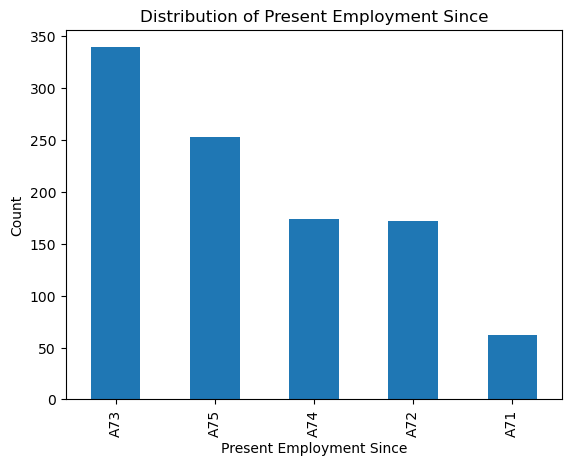

In [176]:
# Count the number of occurrences for each category
present_emp_since_counts = df['present_emp_since'].value_counts()

# Visualize the distribution using a bar plot
present_emp_since_counts.plot(kind='bar')
plt.xlabel('Present Employment Since')
plt.ylabel('Count')
plt.title('Distribution of Present Employment Since')
plt.show()

# Calculate the percentage of each category
present_emp_since_percentages = df['present_emp_since'].value_counts(normalize=True) * 100


A73 has the highest number of employment, A71 can be working people who are employed and A71 has the least number of employement, A71 can be students or the senior citizens who are unemployed.

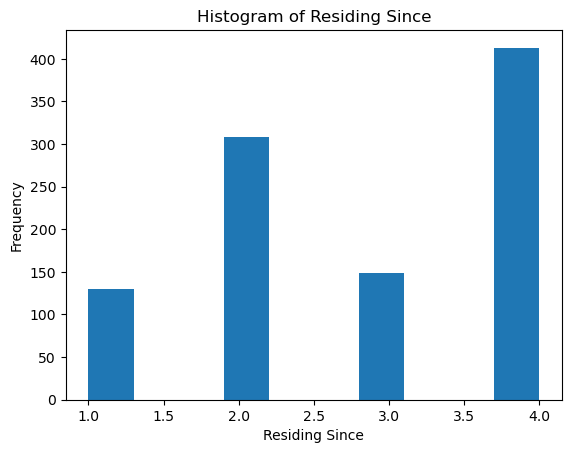

In [177]:
# Examine the range and distribution of the values
residing_since_range = (df['residing_since'].min(), df['residing_since'].max())

# Plot a histogram to visualize the frequency of different durations of residence
plt.hist(df['residing_since'], bins=10)
plt.xlabel('Residing Since')
plt.ylabel('Frequency')
plt.title('Histogram of Residing Since')
plt.show()

# Calculate descriptive statistics
residing_since_mean = df['residing_since'].mean()
residing_since_median = df['residing_since'].median()
residing_since_std = df['residing_since'].std()


Maximum people who take loans are residing since 4.0 years at the same address

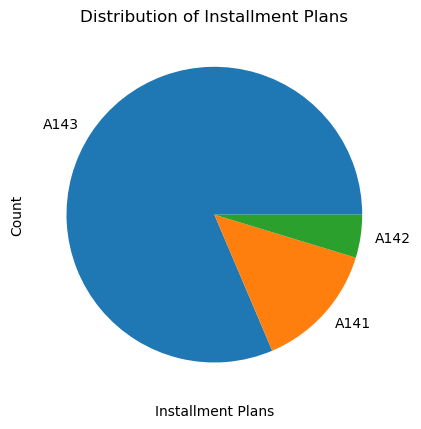

In [178]:
# Count the number of occurrences for each category
inst_plans_counts = df['inst_plans'].value_counts()

# Visualize the distribution using a bar plot
inst_plans_counts.plot(kind='pie')
plt.xlabel('Installment Plans')
plt.ylabel('Count')
plt.title('Distribution of Installment Plans')
plt.show()

# Calculate the percentage of each category
inst_plans_percentages = df['inst_plans'].value_counts(normalize=True) * 100


A143 is highest preferred installment plan, maybe because of better interest rate, duration ,etc benifits they get here.

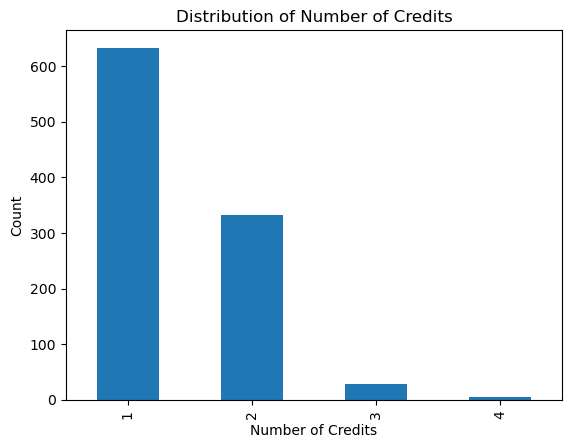

In [179]:
# Count the number of occurrences for each category
num_credits_counts = df['num_credits'].value_counts()

# Visualize the distribution using a bar plot
num_credits_counts.plot(kind='bar')
plt.xlabel('Number of Credits')
plt.ylabel('Count')
plt.title('Distribution of Number of Credits')
plt.show()

# Calculate the percentage of each category
num_credits_percentages = df['num_credits'].value_counts(normalize=True) * 100


Many people prefer taking only 1 or 2 loan from the bank, beacause of the risk, their capacity and other constraint associated to it, Very few people prefer to take 3 or more loan

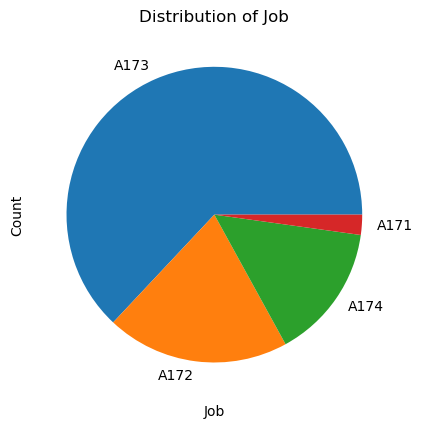

In [180]:
# Count the number of occurrences for each category
job_counts = df['job'].value_counts()

# Visualize the distribution using a bar plot
job_counts.plot(kind='pie')
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Distribution of Job')
plt.show()

# Calculate the percentage of each category
job_percentages = df['job'].value_counts(normalize=True) * 100


Maxium People from A173 jobs takes loans from this bank

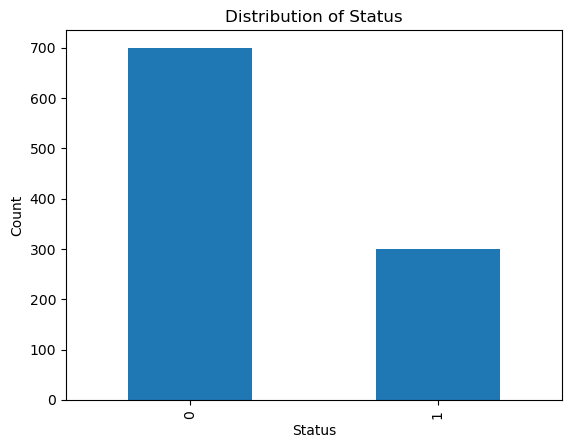

In [181]:
# Count the number of occurrences for each category
status_counts = df['status'].value_counts()

# Visualize the distribution using a bar plot
status_counts.plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status')
plt.show()

# Calculate the percentage of each category
status_percentages = df['status'].value_counts(normalize=True) * 100


The ratio for not defaulters w.r.t defaulters is higher which is normal. 

## Bivariate analysis

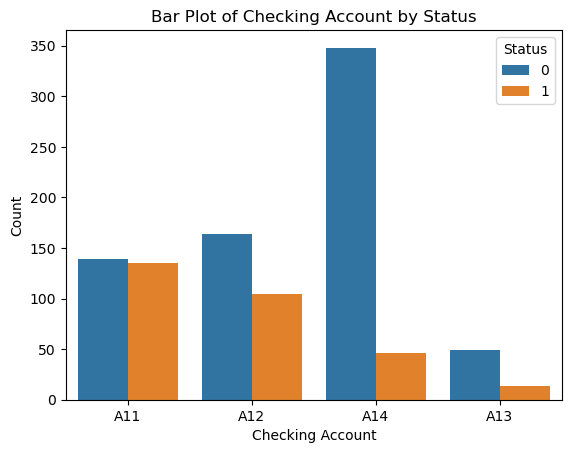

In [182]:
sns.countplot(x=df['checkin_acc'], hue=df['status'])
plt.xlabel('Checking Account')
plt.ylabel('Count')
plt.title('Bar Plot of Checking Account by Status')
plt.legend(title='Status')
plt.show()


In [183]:
# A11 category is least suitable to 

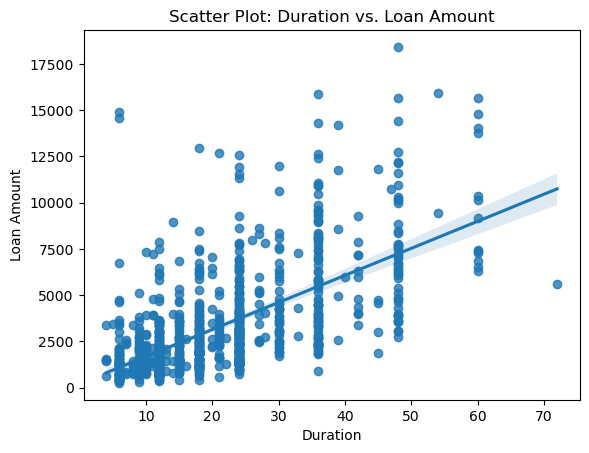

In [184]:
sns.regplot(x=df['duration'], y=df['amount'])
plt.xlabel('Duration')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot: Duration vs. Loan Amount')
plt.show()

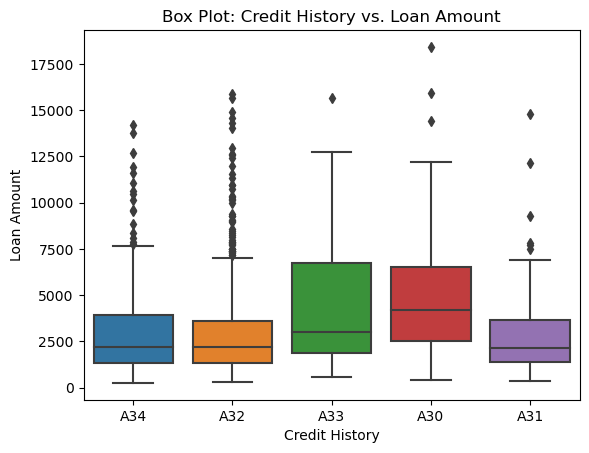

In [185]:
sns.boxplot(x=df['credit_history'], y=df['amount'])
plt.xlabel('Credit History')
plt.ylabel('Loan Amount')
plt.title('Box Plot: Credit History vs. Loan Amount')
plt.show()

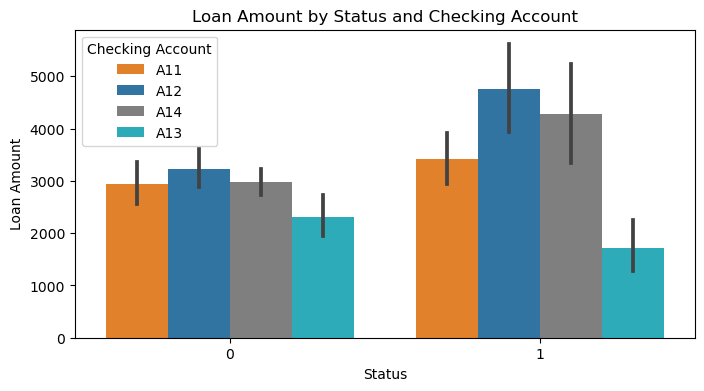

In [186]:
plt.figure(figsize=(8, 4))

sns.barplot(x=df['status'], y=df['amount'], hue=df['checkin_acc'], palette = ['tab:orange', 'tab:blue','tab:grey','tab:cyan'])
plt.xlabel('Status')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Status and Checking Account')
plt.legend(title='Checking Account')
plt.show()


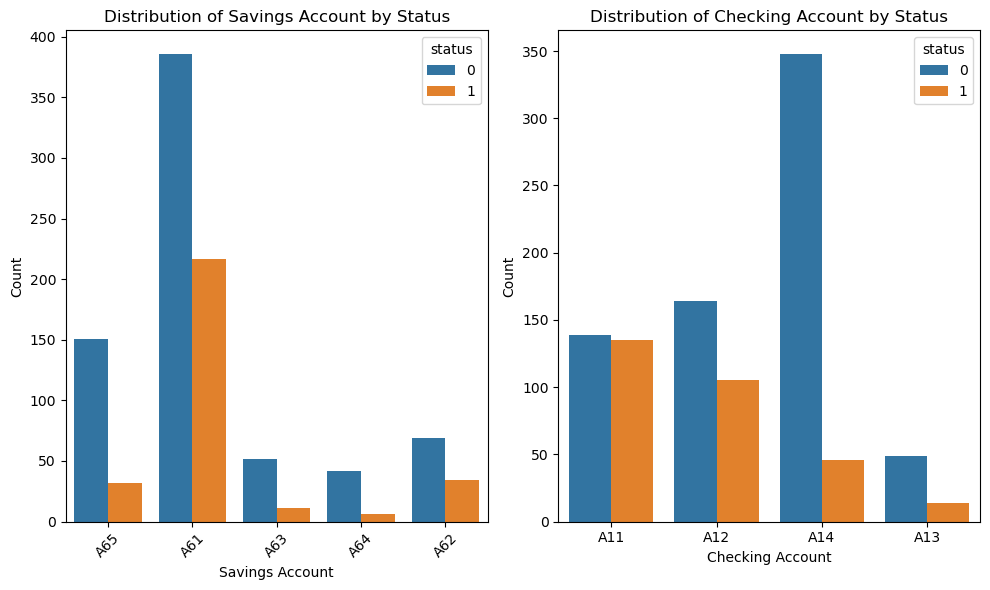

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
sns.countplot(x="savings_acc", hue="status", data=df, ax=ax1)
sns.countplot(x="checkin_acc", hue="status", data=df, ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel('Savings Account')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Savings Account by Status')
ax2.set_xlabel('Checking Account')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Checking Account by Status')
plt.tight_layout()
plt.show()


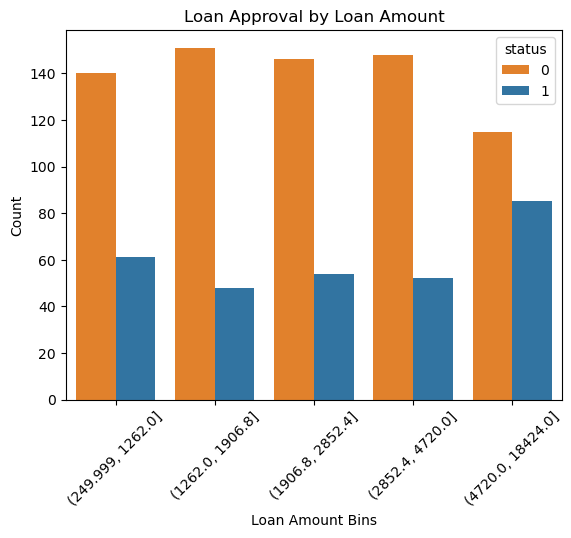

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Apply qcut to create bins for loan amount
df['amount_bins'] = pd.qcut(df['amount'], q=5)

# Plot loan amount vs. loan approval
sns.countplot(data=df, x='amount_bins', hue='status', palette = ['tab:orange', 'tab:blue'])

# Add title and labels
plt.xlabel('Loan Amount Bins')
plt.ylabel('Count')
plt.title('Loan Approval by Loan Amount')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()


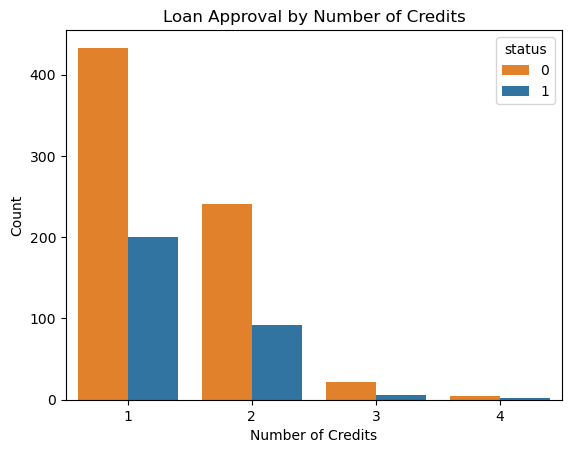

In [189]:

# Plot number of credits vs. loan approval
sns.countplot(data=df, x='num_credits', hue='status', palette = ['tab:orange', 'tab:blue'])

# Add title and labels
plt.xlabel('Number of Credits')
plt.ylabel('Count')
plt.title('Loan Approval by Number of Credits')

plt.show()


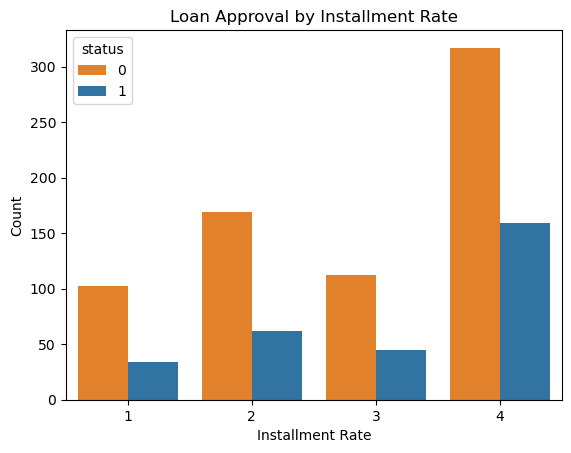

In [190]:
# Plot installment rate vs. loan approval
sns.countplot(data=df, x='inst_rate', hue='status', palette = ['tab:orange', 'tab:blue'])

# Add title and labels
plt.xlabel('Installment Rate')
plt.ylabel('Count')
plt.title('Loan Approval by Installment Rate')

plt.show()


## Outlier treatment 

#### IQR method

In [191]:
df.dtypes

checkin_acc            object
duration                int64
credit_history         object
amount                  int64
savings_acc            object
present_emp_since      object
inst_rate               int64
personal_status        object
residing_since          int64
age                     int64
inst_plans             object
num_credits             int64
job                    object
status                  int64
amount_bins          category
dtype: object

In [192]:
df['status'] = df['status'].astype('object')

In [193]:
df.shape

(1000, 15)

In [194]:
df_num = df.select_dtypes(include='number')

In [195]:
# obtain the first quartile
Q1 = df_num.quantile(0.25)

# obtain the third quartile
Q3 = df_num.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

duration            12.00
amount            2606.75
inst_rate            2.00
residing_since       2.00
age                 15.00
num_credits          1.00
dtype: float64


In [196]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
# any() : returns whether any element is True over the columns
# axis : "1" indicates columns should be altered (0 for 'index')
df = df[~((df_num < (Q1 - 3 * IQR)) |(df_num > (Q3 + 3 * IQR))).any(axis=1)]

In [197]:
df.shape

(975, 15)

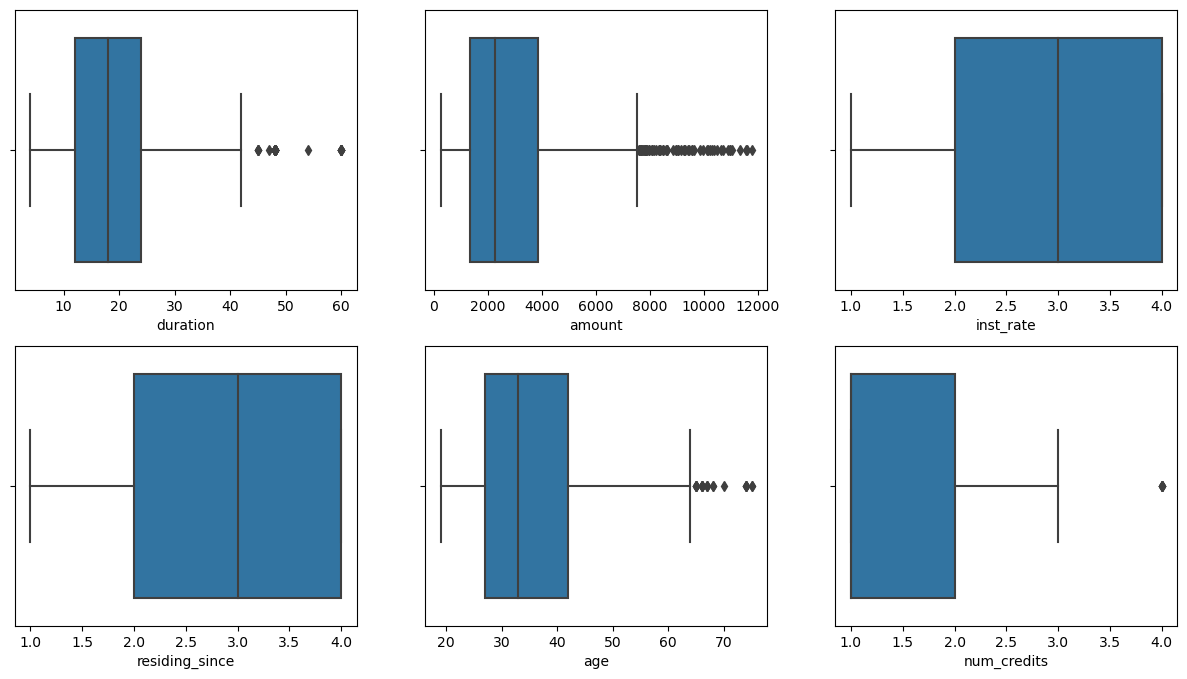

In [198]:
# consider the variables which has outliers
variables = ['duration', 'amount', 'inst_rate', 'residing_since', 'age','num_credits']

# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: set the font size of the x-axis label
for variable, subplot in zip(df[variables], ax.flatten()):
    z = sns.boxplot(x=df[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 10)
plt.show()

## Train test Split

In [199]:
# Assuming your target variable is named 'target_variable'
X = df.drop(['status','amount_bins'], axis=1)
y = df['status']

In [200]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
# dimensions of train and test data 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((780, 13), (195, 13), (780,), (195,))

## One-hot Encoding

In [202]:
from sklearn.preprocessing import OneHotEncoder

# Assuming your DataFrame is named df
cols = ['checkin_acc', 'credit_history', 'savings_acc', 'present_emp_since', 'personal_status', 'inst_plans', 'job']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the selected columns
df_encoded = encoder.fit_transform(df[cols])

# Create a new DataFrame with the encoded features
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(cols))

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df.drop(columns=cols), df_encoded], axis=1)

# Check the encoded DataFrame
df.head()
df.shape

/Users/areebsayed/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(1000, 31)

In [203]:
df=df.dropna()

In [204]:
df.shape

(950, 31)

In [205]:
df = df.drop('amount_bins', axis=1)

In [206]:
df.dtypes

duration                 float64
amount                   float64
inst_rate                float64
residing_since           float64
age                      float64
num_credits              float64
status                    object
checkin_acc_A12          float64
checkin_acc_A13          float64
checkin_acc_A14          float64
credit_history_A31       float64
credit_history_A32       float64
credit_history_A33       float64
credit_history_A34       float64
savings_acc_A62          float64
savings_acc_A63          float64
savings_acc_A64          float64
savings_acc_A65          float64
present_emp_since_A72    float64
present_emp_since_A73    float64
present_emp_since_A74    float64
present_emp_since_A75    float64
personal_status_A92      float64
personal_status_A93      float64
personal_status_A94      float64
inst_plans_A142          float64
inst_plans_A143          float64
job_A172                 float64
job_A173                 float64
job_A174                 float64
dtype: obj

In [207]:
df['status'] = df['status'].astype('int')

In [208]:
y.dtypes

dtype('O')

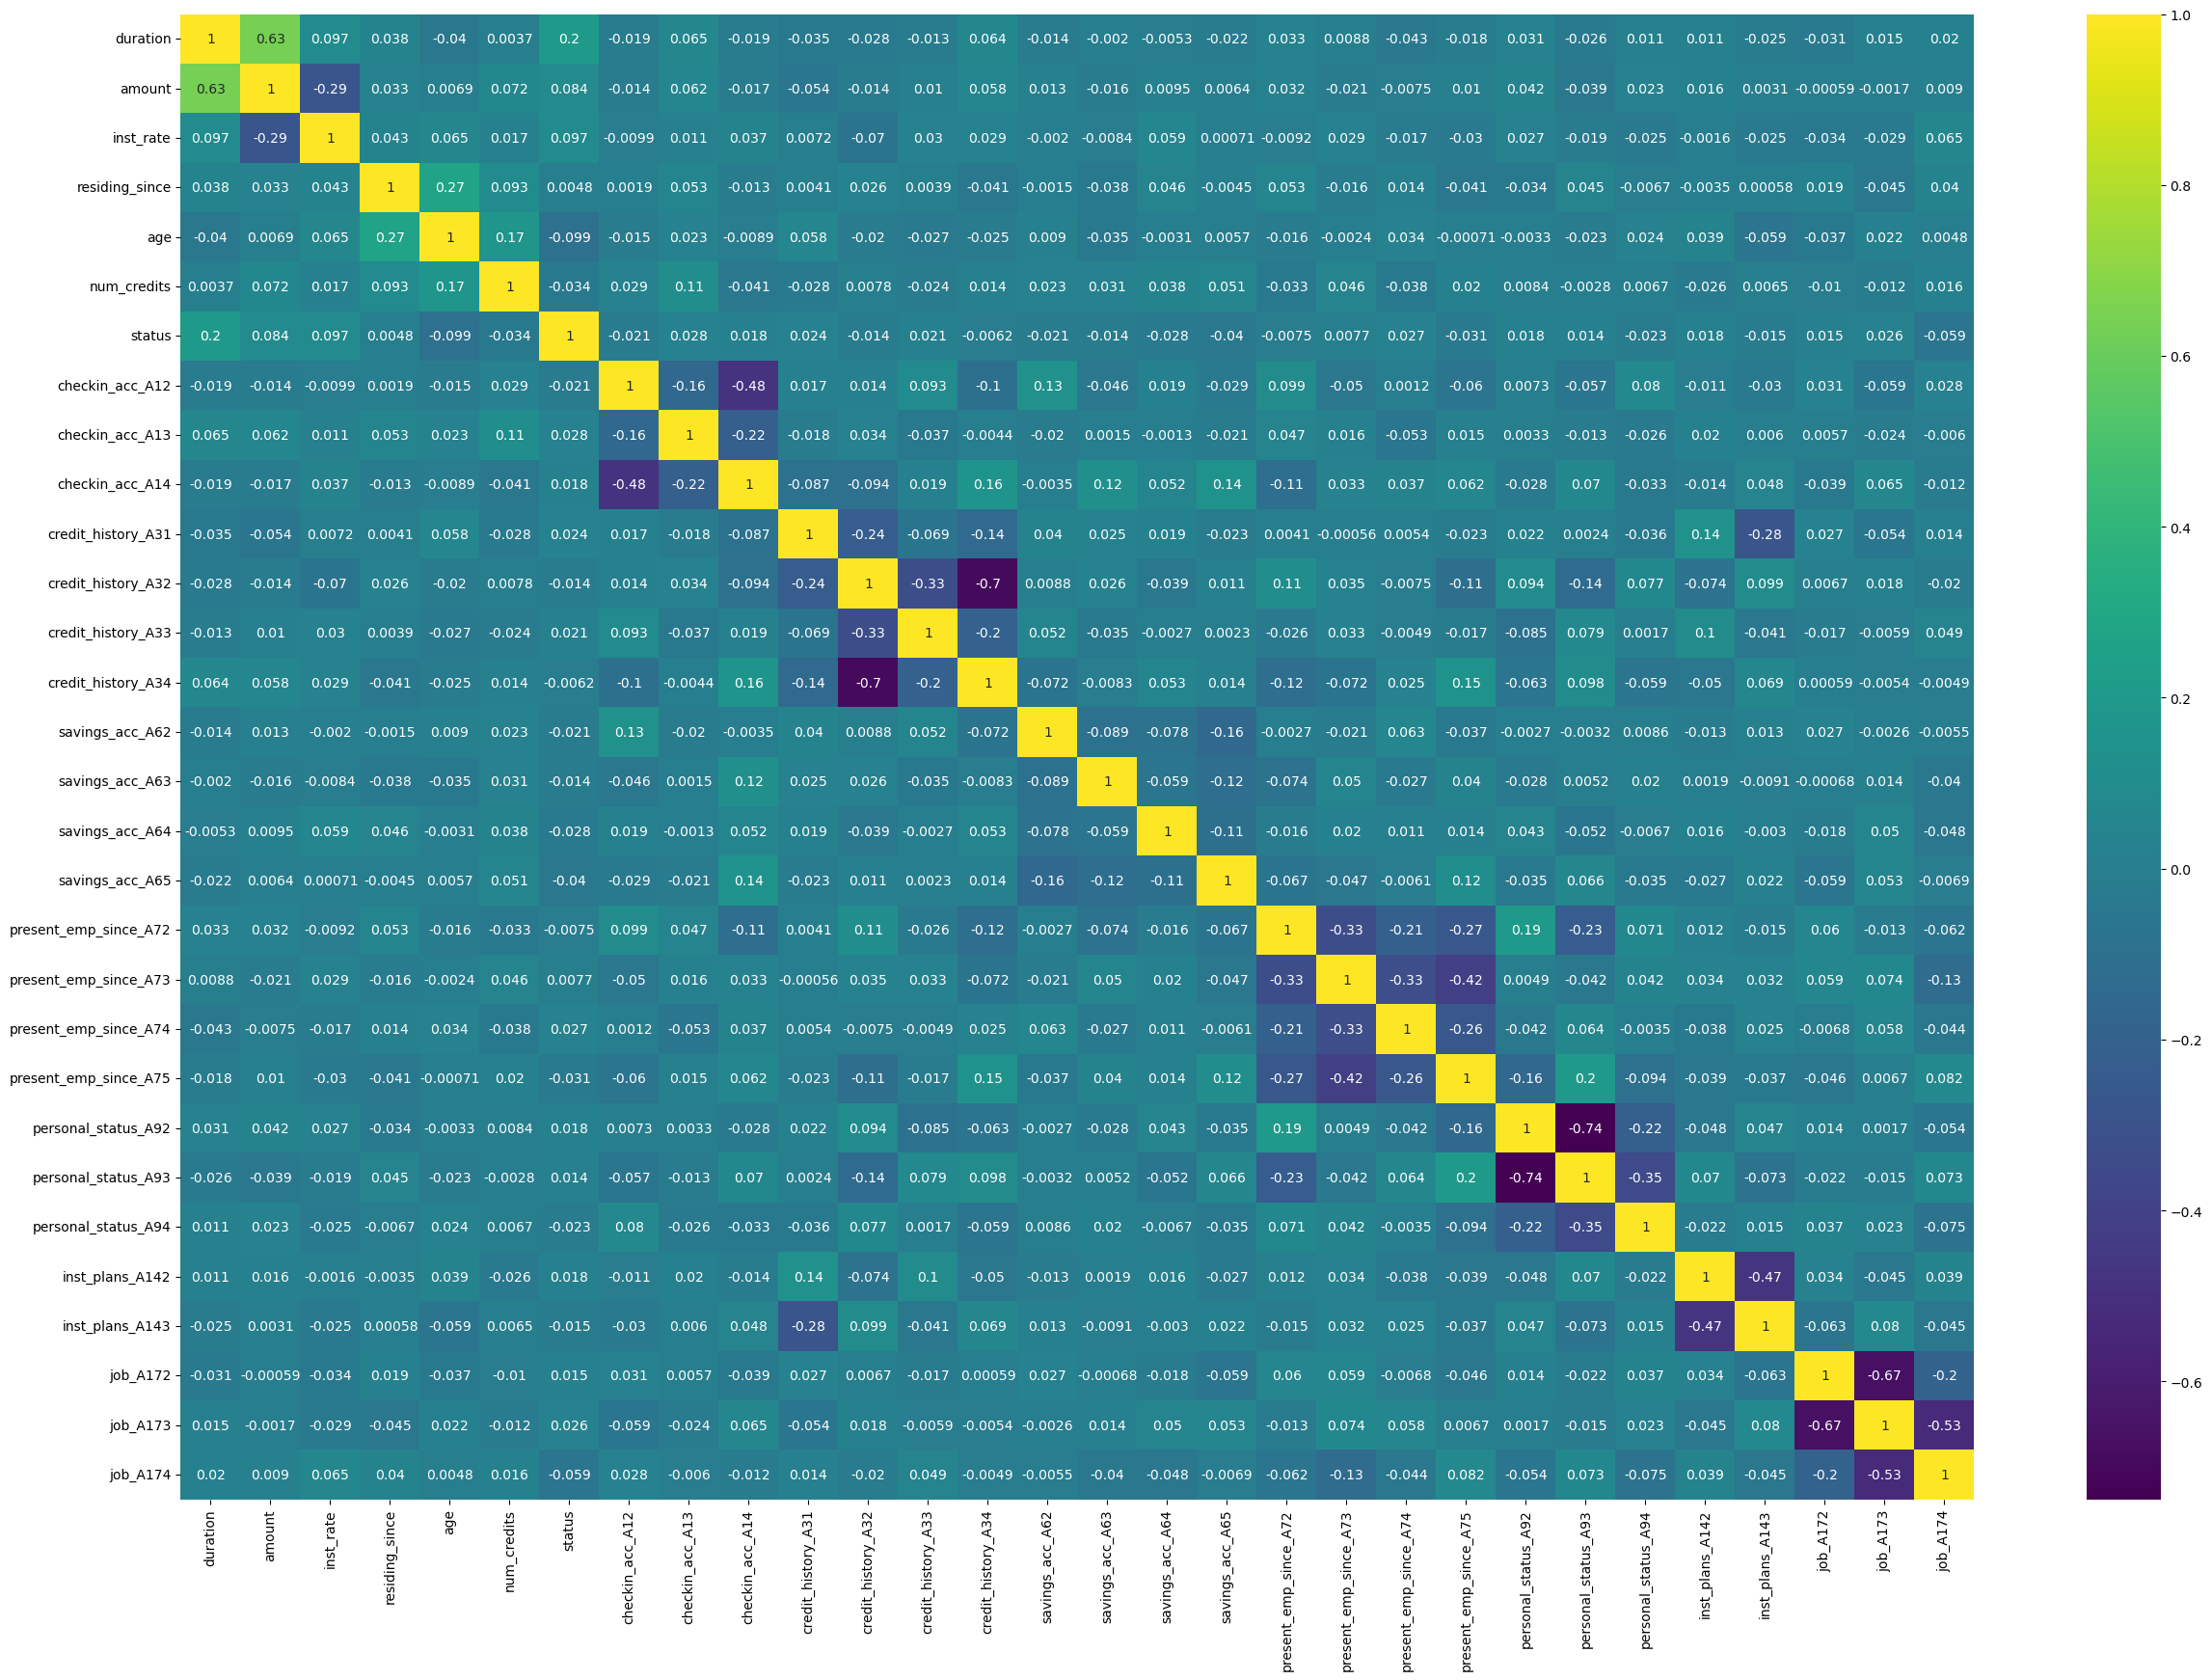

In [209]:
plt.figure(figsize = (30,20))
sns.heatmap(df.corr(), annot = True, cmap = "viridis")
plt.show()

In [218]:
X_train.columns

Index(['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc',
       'present_emp_since', 'inst_rate', 'personal_status', 'residing_since',
       'age', 'inst_plans', 'num_credits', 'job'],
      dtype='object')

In [215]:
# Create an instance of the Logistic Regression model
logreg = LogisticRegression()

# Fit the Logistic Regression model to the training data to learn the coefficients
logreg.fit(X_train, y_train)

# Recursive Feature Elimination (RFE) with the Logistic Regression model as the estimator and select the top 15 features
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit the RFE model to the training data to select the top 15 features based on their importance
rfe = rfe.fit(X_train, y_train)

ValueError: could not convert string to float: 'A14'

In [ ]:
# combine=ing columns , rfe_support, rfe_ranking 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
# Add a constant term to the features
X = sm.add_constant(X)

# Create a logistic regression model
logit_model = sm.Logit(y,X).fit()

# Print the model summary
logit_model.summary()